# Programatically understand Gaussian Processes: Part 1

There exist some great online resources for Gaussian Processes (GPs). Here is another one, with a programatic flavour. In this notebook, we will build the intuition and learn some basics of GPs. This notebook is heavily inspired by the awesome tutorial by Richard Turner. Here is the link to the [slides](http://cbl.eng.cam.ac.uk/pub/Public/Turner/News/imperial-gp-tutorial.pdf) and [video](https://www.youtube.com/watch?v=92-98SYOdlY)

### Some imports

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### A function to make the Matplotlib plots prettier

In [39]:
SPINE_COLOR = 'gray'

def format_axes(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

## One dimensional Gaussian/Normal

We will start the discussion with 1d Gaussians. Let us write some simple code to generate/sample data from $\mathcal{N}(\mu=0, \sigma=1)$

In [40]:
one_dim_normal_data = np.random.normal(0, 1, size=10000)

Let us now visualise the data in a 1d space using scatter

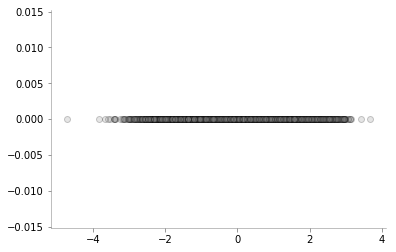

In [41]:
plt.scatter(one_dim_normal_data, np.zeros_like(one_dim_normal_data), alpha=0.2, c='gray', edgecolors='k', marker='o')
format_axes(plt.gca())

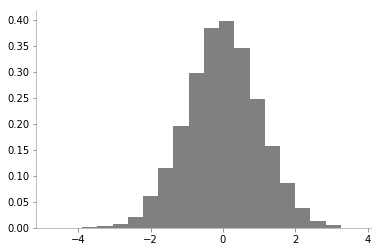

In [42]:
plt.hist(one_dim_normal_data, density=True, bins=20, color='gray')
format_axes(plt.gca())

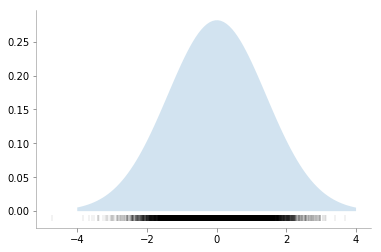

In [43]:
from sklearn.neighbors import KernelDensity

x_d = np.linspace(-4, 4, 100)

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(one_dim_normal_data[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.2)
plt.plot(one_dim_normal_data, np.full_like(one_dim_normal_data, -0.01), '|k', markeredgewidth=0.1)
format_axes(plt.gca())

### Plotting a multi-variate Gaussian

In [44]:
data = np.random.multivariate_normal(mean = np.array([0, 0]), cov = np.array([[1, 0.7], [0.7, 1]]), size=(10000, ))

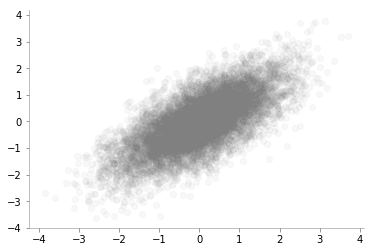

In [45]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.05,c='gray')
format_axes(plt.gca())

In [46]:
import pandas as pd
data_df = pd.DataFrame(data, columns=['x','y'])

/home/nipunbatra-pc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


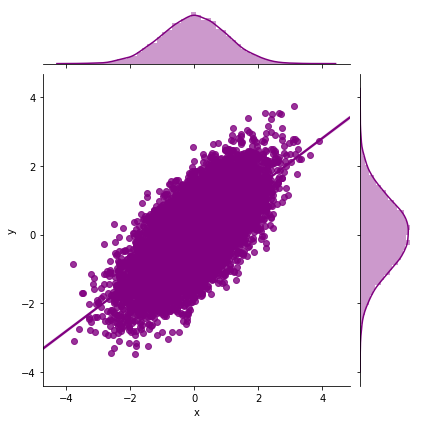

In [11]:
import seaborn as sns
g = sns.jointplot(x= 'x', y='y', data=data_df, kind="reg",color='purple')

In [12]:
def plot_jointplot_2d(corr):
    data = np.random.multivariate_normal(mean = np.array([0, 0]), cov = np.array([[1, corr], [corr, 1]]), size=(10000, ))
    data_df = pd.DataFrame(data, columns=['x','y'])
    g = sns.jointplot(x= 'x', y='y', data=data_df, kind="reg",color='purple')

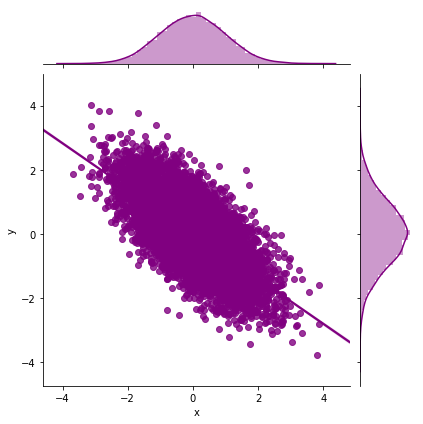

In [13]:
plot_jointplot_2d(-0.7)

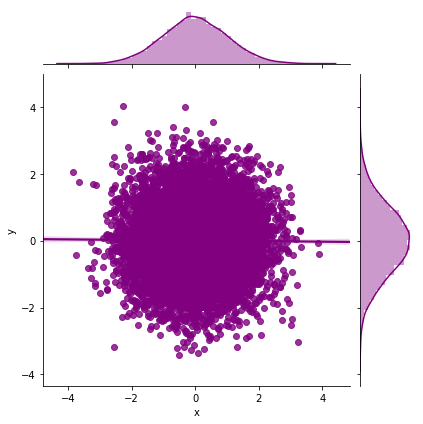

In [14]:
plot_jointplot_2d(0)

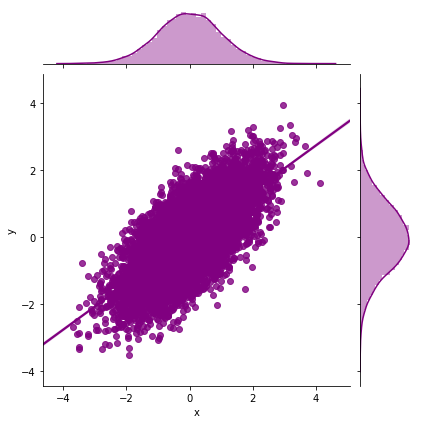

In [15]:
plot_jointplot_2d(0.7)

In [34]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


def make_pdf_2d_gaussian(mu, sigma):
    N = 60
    X = np.linspace(-3, 3, N)
    Y = np.linspace(-3, 4, N)
    X, Y = np.meshgrid(X, Y)

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = multivariate_normal(mu, sigma)
    Z = F.pdf(pos)



    # Create a surface plot and projected filled contour plot under it.
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.Purples)
    
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("PDF")

    cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.Purples)

    # Adjust the limits, ticks and view angle
    ax.set_zlim(-0.15,0.25)
    ax.set_zticks(np.linspace(0,0.2,5))
    ax.view_init(27, -15)
    ax.set_title(f'Mean = {mu}\n Sigma = {sigma}')

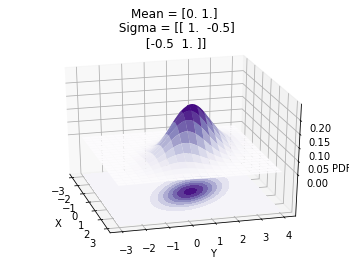

In [17]:
# Mean vector and covariance matrix
mu = np.array([0., 1.])
sigma = np.array([[ 1. , -0.5], [-0.5,  1]])

make_pdf_2d_gaussian(mu, sigma)

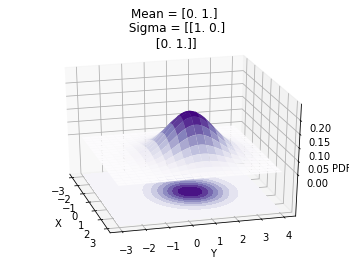

In [18]:
# Mean vector and covariance matrix
mu = np.array([0., 1.])
sigma = np.array([[ 1. , 0], [0,  1]])

make_pdf_2d_gaussian(mu, sigma)

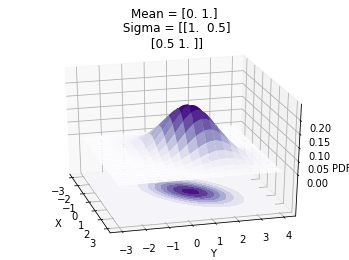

In [19]:
# Mean vector and covariance matrix
mu = np.array([0., 1.])
sigma = np.array([[ 1. , 0.5], [0.5,  1.]])

make_pdf_2d_gaussian(mu, sigma)

In [20]:
def plot_2d_contour_pdf(mu, sigma):
    X = np.linspace(-3, 3, 60)
    Y = np.linspace(-3, 4, 60)
    X, Y = np.meshgrid(X, Y)

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = multivariate_normal(mu, sigma)
    Z = F.pdf(pos)

    
    plt.title(f'Mean = {mu}\n Sigma = {sigma}')
    plt.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.Purples)
    plt.colorbar()
    format_axes(plt.gca())

/home/nipunbatra-pc/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  s)


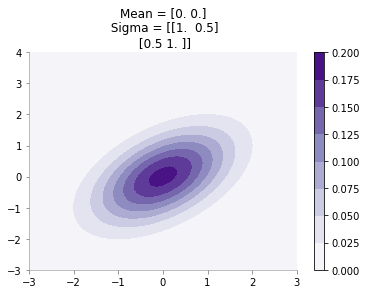

In [21]:
mu = np.array([0., 0.])
sigma = np.array([[ 1. , 0.5], [0.5,  1.]])
plot_2d_contour_pdf(mu, sigma)

/home/nipunbatra-pc/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  s)


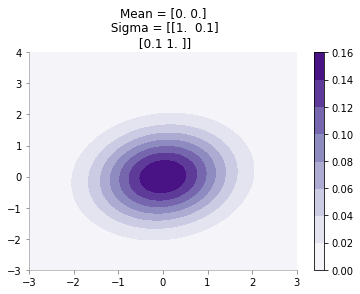

In [22]:
mu = np.array([0., 0.])
sigma = np.array([[ 1. , 0.1], [0.1,  1.]])
plot_2d_contour_pdf(mu, sigma)

### Sample from 2d gaussian and visualise it on XY plane

In [23]:
def plot_2d_contour_pdf_dimensions(mu, sigma, random_num):
    fig, ax  = plt.subplots(ncols=3, figsize=(12, 4))

    X = np.linspace(-3, 3, 60)
    Y = np.linspace(-3, 3, 60)
    X, Y = np.meshgrid(X, Y)

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = multivariate_normal(mu, sigma)
    Z = F.pdf(pos)
    random_point = F.rvs(random_state=random_num)
    
    sns.heatmap(sigma, ax=ax[0], annot=True)
    ax[1].contour(X, Y, Z, cmap=cm.Purples)
    ax[1].scatter(random_point[0], random_point[1], color='k',s=100)
    ax[1].set_xlabel(r"$X_1$")
    ax[1].set_ylabel(r"$X_2$")
    
    data_array = pd.Series(random_point, index=['X1','X2'])
    data_array.plot(ax=ax[2], kind='line', marker='o',color='k')
    plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    ax[2].set_ylim(-3, 3)
    format_axes(ax[0])
    format_axes(ax[1])
    format_axes(ax[2])
    ax[0].set_title("Covariance Matrix")
    ax[1].set_title("Contour of pdf")
    ax[2].set_title("Visualising the point")
    plt.suptitle(f"Random state = {random_num}", y=1.1)
    plt.tight_layout()
    import os
    if not os.path.exists("images"):
        os.makedirs("images")
    if not os.path.exists(f"images/{sigma[0, 1]}"):
        os.makedirs(f"images/{sigma[0, 1]}")
    plt.savefig(f"images/{sigma[0, 1]}/{random_num}.jpg", bbox_inches="tight")
    plt.close()

In [24]:
for i in range(20):
    plot_2d_contour_pdf_dimensions( mu, np.array([[ 1. , 0.1], [0.1,  1.]]), i)

In [25]:
!convert -delay 20 -loop 0 images/0.1/*.jpg sigma-0-1.gif

![](sigma-0-1.gif)

In [26]:
for i in range(20):
    plot_2d_contour_pdf_dimensions( mu, np.array([[ 1. , 0.7], [0.7,  1.]]), i)

In [27]:
!convert -delay 20 -loop 0 images/0.7/*.jpg sigma-0-7.gif

![](sigma-0-7.gif)

### Conditional Bivariate Distribution

$$
\begin{pmatrix}
 X_1 \\
 X_2
\end{pmatrix}  \sim \mathcal{N} \left( \begin{pmatrix}
 0 \\
 0
\end{pmatrix} , \begin{pmatrix}
 1 & \rho \\
 \rho & 1
\end{pmatrix} \right)
$$

The conditional expectation of $X_2$ given $X_1$ is: $\operatorname{E}(X_2 \mid X_1=x_1)= \rho x_1 $

and the conditional variance is: $\operatorname{var}(X_2 \mid X_1 = x_1) = 1-\rho^2$ 

Let us fix $X_1 = 1$

In [28]:
def plot_2d_contour_pdf_dimensions_fixed_x1(sigma, random_num, x1 = 1):
    mu = np.zeros(2)
    fig, ax  = plt.subplots(ncols=3, figsize=(12, 4))

    X = np.linspace(-3, 3, 60)
    Y = np.linspace(-3, 3, 60)
    X, Y = np.meshgrid(X, Y)

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = multivariate_normal(mu, sigma)
    Z = F.pdf(pos)
    
    rho = sigma[0, 1]
    F_cond_x1 = multivariate_normal(rho*x1, 1-rho**2)
    random_point_x2 = F_cond_x1.rvs(random_state=random_num)
    sns.heatmap(sigma, ax=ax[0], annot=True)
    ax[1].contour(X, Y, Z, cmap=cm.Purples)
    ax[1].scatter(x1, random_point_x2, color='k',s=100)
    ax[1].set_xlabel(r"$X_1$")
    ax[1].set_ylabel(r"$X_2$")
    
    data_array = pd.Series([x1, random_point_x2], index=['X1','X2'])
    data_array.plot(ax=ax[2], kind='line', color='k')
    ax[2].scatter(x=0, y=x1, color='red', s=100)
    ax[2].scatter(x=1, y=random_point_x2, color='k', s=100)
    

    plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    ax[2].set_ylim(-3, 3)
    format_axes(ax[0])
    format_axes(ax[1])
    format_axes(ax[2])
    ax[0].set_title("Covariance Matrix")
    ax[1].set_title("Contour of pdf")
    ax[2].set_title("Visualising the point")
    plt.suptitle(f"Random state = {random_num}", y=1.1)
    plt.tight_layout()
    import os
    if not os.path.exists("images/conditional/"):
        os.makedirs("images/conditional/")
    if not os.path.exists(f"images/conditional/{sigma[0, 1]}"):
        os.makedirs(f"images/conditional/{sigma[0, 1]}")
    plt.savefig(f"images/conditional/{sigma[0, 1]}/{random_num}.jpg", bbox_inches="tight")
    plt.close()

In [29]:
for i in range(20):
    plot_2d_contour_pdf_dimensions_fixed_x1(np.array([[ 1. , 0.1], [0.1,  1.]]), i)

In [30]:
!convert -delay 20 -loop 0 images/conditional/0.1/*.jpg conditional-sigma-0-1.gif

![](conditional-sigma-0-1.gif)

In [31]:
for i in range(20):
    plot_2d_contour_pdf_dimensions_fixed_x1(np.array([[ 1. , 0.7], [0.7,  1.]]), i)

In [32]:
!convert -delay 20 -loop 0 images/conditional/0.7/*.jpg conditional-sigma-0-7.gif

![](conditional-sigma-0-7.gif)

#### Visualising the same procedure for 5 dimensional Gaussian

In [33]:
covariance_5d = np.array([[1, 0.9, 0.8, 0.6, 0.4],
                          [0.9, 1, 0.9, 0.8, 0.6],
                          [0.8, 0.9, 1, 0.9, 0.8],
                          [0.6, 0.8, 0.9, 1, 0.9],
                          [0.4, 0.6, 0.8, 0.9, 1]])

In [34]:
def plot_5d_contour_pdf_dimensions(cov, random_num):
    fig, ax  = plt.subplots(ncols=2, figsize=(6, 3))

    mu = np.zeros(5)
    F = multivariate_normal(mu, cov)
    random_point = F.rvs(random_state=random_num)
    
    sns.heatmap(cov, ax=ax[0], annot=True)
    
    
    data_array = pd.Series(random_point, index=['X1','X2','X3','X4', 'X5'])
    data_array.plot(ax=ax[1], kind='line', marker='o',color='k')
    plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    ax[1].set_ylim(-3, 3)
    for i in range(2):
        format_axes(ax[i])
    
    ax[0].set_title("Covariance Matrix")
    ax[-1].set_title("Visualising the point")
    plt.suptitle(f"Random state = {random_num}", y=1.1)
    plt.tight_layout()
    import os
    if not os.path.exists("images/5d/"):
        os.makedirs("images/5d")
    
    plt.savefig(f"images/5d/{random_num}.jpg", bbox_inches="tight")
    plt.close()

In [35]:
plot_5d_contour_pdf_dimensions(covariance_5d, 2)

In [36]:
for i in range(20):
    plot_5d_contour_pdf_dimensions(covariance_5d, i)

In [37]:
!convert -delay 20 -loop 0 images/5d/*.jpg 5d.gif

![](5d.gif)

### Conditional Multivariate Distribution

Borrowing from Wikipedia

If $N$-dimensional $x$ is partitioned as follows

$$
\mathbf{x}
=
\begin{bmatrix}
 \mathbf{x}_A \\
 \mathbf{x}_B
\end{bmatrix}
\text{ with sizes }\begin{bmatrix} q \times 1 \\ (N-q) \times 1 \end{bmatrix}
$$

and accordingly $μ$ and $Σ$ are partitioned as follows

$$
\boldsymbol\mu
=
\begin{bmatrix}
 \boldsymbol\mu_A \\
 \boldsymbol\mu_B
\end{bmatrix}
\text{ with sizes }\begin{bmatrix} q \times 1 \\ (N-q) \times 1 \end{bmatrix}
$$

$$
\boldsymbol\Sigma
=
\begin{bmatrix}
 \boldsymbol\Sigma_{AA} & \boldsymbol\Sigma_{AB} \\
 \boldsymbol\Sigma_{BA} & \boldsymbol\Sigma_{BB}
\end{bmatrix}
\text{ with sizes }\begin{bmatrix} q \times q & q \times (N-q) \\ (N-q) \times q & (N-q) \times (N-q) \end{bmatrix}
$$

then the distribution of $x_A$ conditional on $x_B=b$ is multivariate normal $(x_A|x_B=b)\sim \mathcal{N}(\bar{\mu}, \bar{\Sigma})$

$$
\bar{\boldsymbol\mu}
=
\boldsymbol\mu_A + \boldsymbol\Sigma_{AB} \boldsymbol\Sigma_{BB}^{-1}
\left(
 \mathbf{B} - \boldsymbol\mu_B
\right)
$$

and covariance matrix

$$
\overline{\boldsymbol\Sigma}
=
\boldsymbol\Sigma_{AA} - \boldsymbol\Sigma_{AB} \boldsymbol\Sigma_{BB}^{-1} \boldsymbol\Sigma_{BA}.
$$


Let us for our example take X5 = -2. 

We have:

* $x_A = [x_1, x_2, x_3, x_4]$ and $x_B = [x_5]$
* Assuming the covariance matrix of size 5 X 5 is referred as $C$
* $$
\boldsymbol\Sigma_{AA}
=
\begin{bmatrix}
 C_{11} & C_{12} & C_{13} & C_{14}\\
 C_{21} & C_{22} & C_{23} & C_{24}\\
 C_{31} & C_{32} & C_{33} & C_{34}\\
 C_{41} & C_{42} & C_{43} & C_{44}\\
\end{bmatrix} \\
$$
* $$
\boldsymbol\Sigma_{AB}
=
\begin{bmatrix}
 C_{15}\\
 C_{25}\\
 C_{35}\\
 C_{45}\\
\end{bmatrix}
$$

* $$
\boldsymbol\Sigma_{BA}
=
\begin{bmatrix}
 C_{51}& C_{52} & C_{53} & C_{54}\\
\end{bmatrix}
$$

* $$
\boldsymbol\Sigma_{BB}
=
\begin{bmatrix}
 C_{55}\\
\end{bmatrix}
$$



Putting in the numbers we get:
    

In [38]:
sigma_AA = covariance_5d[:4, :4]

In [39]:
sigma_AA

array([[1. , 0.9, 0.8, 0.6],
       [0.9, 1. , 0.9, 0.8],
       [0.8, 0.9, 1. , 0.9],
       [0.6, 0.8, 0.9, 1. ]])

In [40]:
sigma_AB = covariance_5d[:4, 4].reshape(-1, 1)

In [41]:
sigma_AB

array([[0.4],
       [0.6],
       [0.8],
       [0.9]])

In [42]:
sigma_BA = covariance_5d[4, :4].reshape(1, -1)

In [43]:
sigma_BA

array([[0.4, 0.6, 0.8, 0.9]])

In [44]:
sigma_BB = covariance_5d[4, 4].reshape(-1, 1)

In [45]:
sigma_BB

array([[1.]])

Now, calculating $\bar{\mu}$

In [46]:
mu_bar = np.zeros((4, 1)) + sigma_AB@np.linalg.inv(sigma_BB)*(-2)

In [47]:
mu_bar

array([[-0.8],
       [-1.2],
       [-1.6],
       [-1.8]])

Since, $x_5$ has highest correlation with $x_4$ it makes sense for $x_5=-2$ to have the mean of $x_4$ to be close to -2.

Now, calculating $\bar{\Sigma}$

In [48]:
sigma_bar = sigma_AA - sigma_AB@np.linalg.inv(sigma_BB)@sigma_BA

In [138]:
sigma_bar

array([[0.84, 0.66, 0.48, 0.24],
       [0.66, 0.64, 0.42, 0.26],
       [0.48, 0.42, 0.36, 0.18],
       [0.24, 0.26, 0.18, 0.19]])

Now, we have the new mean and covariance matrices for $x_A = [x_1, x_2, x_3, x_4]$ and $x_B = [x_5] = [-2]$. Let us now draw some samples fixing $x_5 = -2$

In [50]:
cov = sigma_bar
mu = mu_bar.flatten()
def plot_5d_samples_fixed_x2(random_num):
    fig, ax  = plt.subplots(ncols=2, figsize=(6, 3))
    
    
    F = multivariate_normal(mu, cov)
    
    sns.heatmap(cov, ax=ax[0], annot=True)
    random_point = F.rvs(random_state=random_num)
    
    
    data_array = pd.Series(random_point, index=['X1','X2','X3','X4'])
    data_array['X5'] = -2
    data_array.plot(ax=ax[1], kind='line', marker='.',color='k')
    plt.scatter([4], [-2], color='red')
    plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    ax[1].set_ylim(-3, 3)
    for i in range(2):
        format_axes(ax[i])
    
    ax[0].set_title("Covariance Matrix")
    ax[-1].set_title("Visualising the point")
    plt.suptitle(f"Random state = {random_num}", y=1.1)
    plt.tight_layout()
    import os
    if not os.path.exists("images/5d/conditional/1"):
        os.makedirs("images/5d/conditional/1")
    
    plt.savefig(f"images/5d/conditional/1/{random_num}.jpg", bbox_inches="tight")
    plt.close()
    

In [51]:
for i in range(20):
    plot_5d_samples_fixed_x2(i)

In [52]:
!convert -delay 20 -loop 0 images/5d/conditional/1/*.jpg 5d-conditional-1.gif

![](5d-conditional-1.gif)

### Let's increase to 20 dimensions now!

We can not surely write the covariance matrix for 20 dimensions. Let us use a small trick called the kernel function.

In [53]:
def rbf_kernel(x_1, x_2, sig):
    return np.exp((-(x_1-x_2)**2)/2*(sig**2))

In [54]:
rbf_kernel(1, 1, 0.4)

1.0

In [55]:
rbf_kernel(1, 2, 0.4)

0.9231163463866358

In [56]:
rbf_kernel(1, 2, 1)

0.6065306597126334

In [57]:
C = np.zeros((20, 20))

In [260]:
for i in range(20):
    for j in range(20):
        C[i, j] = rbf_kernel(i, j, 0.5)

Let us plot the heatmap of the covariance matrix

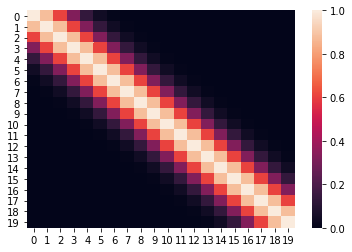

In [261]:
sns.heatmap(C)

#### Let us draw some samples from this 20 dimensional Gaussian

In [262]:
def plot_20d_samples(random_num):
    fig, ax  = plt.subplots(figsize=(10, 3))
    
    
    F = multivariate_normal(np.zeros(20), C)
    random_point = F.rvs(random_state=random_num)
    index = [f'X{i}' for i in range(1, 21)]
    data_array = pd.Series(random_point, index=index)
    data_array.plot(ax=ax, kind='line', marker='.',color='k')
    plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    
    plt.suptitle(f"Random state = {random_num}", y=1.1)
    plt.tight_layout()
    import os
    if not os.path.exists("images/20d/"):
        os.makedirs("images/20d/")
    
    plt.ylim(-3, 3)
    plt.savefig(f"images/20d/{random_num}.jpg", bbox_inches="tight")
    plt.close()

In [263]:
for i in range(50):
    plot_20d_samples(i)

In [264]:
!convert -delay 20 -loop 0 images/20d/*.jpg 20d.gif

![](20d.gif)

#### Let us now condition on a few elements 

Let us have:

* x1 = 1
* x2 = 1.5

In [347]:
order = [2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 5, 10]

In [348]:
new_C = np.zeros_like(C)

In [349]:
old_order = range(20)

In [350]:
for i in range(20):
    for j in range(20):
        new_C[i, j] = C[order[i], order[j]]

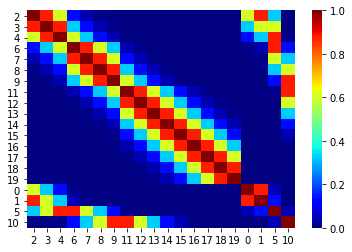

In [351]:
sns.heatmap(new_C, xticklabels=order, yticklabels=order, cmap='jet')

In [352]:
np.trace(new_C)

20.0

Now, we can condition on (x1 = 1, x2 = 3, x6 = -3, X11 = 1). We will use the same procedure we used above in the case of 5d.

In [353]:
B = np.array([1, 3, -3, 1]).reshape(-1, 1)
B

array([[ 1],
       [ 3],
       [-3],
       [ 1]])

In [354]:
sigma_AA_20d = new_C[:-B.size, :-B.size]
sigma_AA_20d.shape

(16, 16)

In [355]:
sigma_BB_20d = new_C[-B.size:, -B.size:]
sigma_BB_20d.shape

(4, 4)

In [356]:
sigma_AB_20d = new_C[:-B.size, -B.size:]
sigma_AB_20d.shape

(16, 4)

In [357]:
sigma_BA_20d = new_C[-B.size:, :-B.size]
sigma_BA_20d.shape

(4, 16)

In [358]:
mu_bar_20d = np.zeros((20-B.size, 1)) + sigma_AB_20d@np.linalg.inv(sigma_BB_20d)@(B)

In [359]:
sigma_bar_20d = sigma_AA_20d - sigma_AB_20d@np.linalg.inv(sigma_BB_20d)@sigma_BA_20d

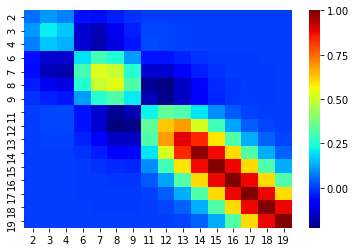

In [360]:
sns.heatmap(sigma_bar_20d, xticklabels=order[:-B.size], yticklabels=order[:-B.size], cmap='jet')

In [361]:
np.trace(sigma_bar_20d)

9.63170431046373

In [375]:
def plot_20d_samples_known_x(random_num):
    fig, ax  = plt.subplots(figsize=(10, 3))
    
    
    F = multivariate_normal(mu_bar_20d.flatten(), sigma_bar_20d)
    random_point = F.rvs(random_state=random_num)
    index = [f'X{i+1}' for i in order[:-B.size]]
    data_array = pd.Series(random_point, index=index)
    data_array['X1'] = 1
    data_array['X2'] = 3
    data_array['X6'] = -3
    data_array['X11'] = -1
    
    data_array = data_array[[f'X{i+1}' for i in range(20)]]
    data_array.plot(ax=ax, kind='line', marker='.',color='k')
    plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    plt.scatter([0, 1,5, 10], [1, 3, -3, -1], color='red',s=100)

    plt.suptitle(f"Random state = {random_num}", y=1.1)
    plt.tight_layout()
    import os
    if not os.path.exists("images/20d/conditional/"):
        os.makedirs("images/20d/conditional/")
    plt.grid()
    plt.ylim(-4, 4)
    plt.savefig(f"images/20d/conditional/{random_num}.jpg", bbox_inches="tight")
    plt.close()

In [377]:
for i in range(50):
    plot_20d_samples_known_x(i)

In [378]:
!convert -delay 20 -loop 0 images/20d/conditional/*.jpg 20d-conditional.gif

In [346]:
new_C_test

array([[1. , 0.9, 0.9],
       [0.9, 1. , 0.8],
       [0.9, 0.8, 1. ]])

![](20d-conditional.gif)

Let us now draw a lot of samples and plot the mean and variance in these samples for the unknown X variables

In [396]:
F = multivariate_normal(mu_bar_20d.flatten(), sigma_bar_20d)
dfs = {}
for random_num in range(100):
    random_point = F.rvs(random_state=random_num)
    index = [f'X{i+1}' for i in order[:-B.size]]
    data_array = pd.Series(random_point, index=index)
    data_array['X1'] = 1
    data_array['X2'] = 3
    data_array['X6'] = -3
    data_array['X11'] = -1
    
    data_array = data_array[[f'X{i+1}' for i in range(20)]]
    dfs[random_num] = data_array


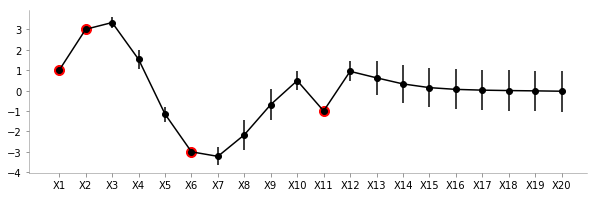

In [397]:
fig, ax = plt.subplots(figsize=(10, 3))
pd.DataFrame(dfs).mean(axis=1).plot(yerr=pd.DataFrame(dfs).std(axis=1),marker='o', color='k')
plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
plt.scatter([0, 1,5, 10], [1, 3, -3, -1], color='red',s=100)
format_axes(plt.gca())

In [387]:
pd.DataFrame(dfs).mean(axis=1)

X1     1.000000
X2     3.000000
X3     3.402765
X4     1.700650
X5    -0.993395
X6    -3.000000
X7    -3.309532
X8    -2.170131
X9    -0.610206
X10    0.541496
X11   -1.000000
X12    0.838771
X13    0.344681
X14   -0.145382
X15   -0.441019
X16   -0.560174
X17   -0.619449
X18   -0.591784
X19   -0.350440
X20   -0.002822
dtype: float64

We can very clearly see that there is low variance in zones where we have the known values and high variance otherwise. The farther we go away from a known value, the more is the variance!

Kernels!

In [28]:
def sig(x1, x2, l, s):
    return s**2*(np.exp((-1/2*(l**2))*((x1-x2)**2)))

In [29]:
sig(1, 2, 0.01, 1)

0.9999500012499791

In [30]:
Cov_matrix = np.zeros((100, 100))


Text(0.5, 0.98, 'Covariance matrix for varying l and s = {s}')

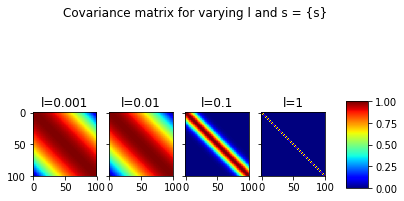

In [467]:
fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True)
for ix, l in enumerate([0.001, 0.01, 0.1, 1]):
    for i in range(100):
        for j in range(100):
            Cov_matrix[i, j] = sig(i, j, l, 1)
    im = ax[ix].imshow(Cov_matrix, cmap='jet')
    ax[ix].set_title(f"l={l}")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.05, 0.3])
fig.colorbar(im, cax=cbar_ax)
plt.suptitle("Covariance matrix for varying l and s = {s}")

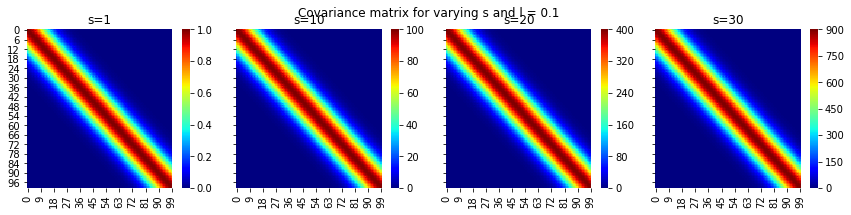

In [472]:
fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True, figsize=(12, 3))
for ix, s in enumerate([1, 10, 20, 30]):
    for i in range(100):
        for j in range(100):
            Cov_matrix[i, j] = sig(i, j, 0.1, s)
    sns.heatmap(Cov_matrix, cmap='jet', ax=ax[ix])
    ax[ix].set_title(f"s={s}")
plt.suptitle("Covariance matrix for varying s and l = 0.1")
fig.tight_layout()

Ok, this is great. Now, let us try and redo the 20 point dataset with varying kernel parameters.

[2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 0, 1, 9, 14]


In [108]:
def fit_plot_gp(kernel_s, kernel_l, known_data, total_data_points, save=False):
    """
    kernel_s: sigma^2 param of kernel
    kernel_l: l (width) param of kernel
    known_data: {pos: value}
    total_data_points
    """
    o = list(range(20))
    for key in known_data.keys():
        o.remove(key)
    o.extend(list(known_data.keys()))
    
    C = np.zeros((total_data_points, total_data_points))
    for i in range(total_data_points):
        for j in range(total_data_points):
            C[i, j] = sig(i, j, kernel_l, kernel_s)
        
    
    # Making known variables shift
    new_C = np.zeros_like(C)
    for i in range(20):
        for j in range(20):
            new_C[i, j] = C[o[i], o[j]]
    B = np.array(list(known_data.values())).reshape(-1, 1)    
    sigma_BA_20d = new_C[-B.size:, :-B.size]
    sigma_AB_20d = new_C[:-B.size, -B.size:]
    sigma_BB_20d = new_C[-B.size:, -B.size:]
    sigma_AA_20d = new_C[:-B.size, :-B.size]

    mu_bar_20d = np.zeros((20-B.size, 1)) + sigma_AB_20d@np.linalg.inv(sigma_BB_20d)@(B)
    sigma_bar_20d = sigma_AA_20d - sigma_AB_20d@np.linalg.inv(sigma_BB_20d)@sigma_BA_20d
    F = multivariate_normal(mu_bar_20d.flatten(), sigma_bar_20d)
    dfs = {}
    for random_num in range(100):
        random_point = F.rvs(random_state=random_num)
        index = [f'X{i+1}' for i in o[:-B.size]]
        data_array = pd.Series(random_point, index=index)
        for k, v in known_data.items():
            data_array[f'X{k+1}'] = v
        

        data_array = data_array[[f'X{i+1}' for i in range(20)]]
        dfs[random_num] = data_array
    fig, ax = plt.subplots(figsize=(10, 3))
    mean_vector = pd.DataFrame(dfs).mean(axis=1)
    mean_vector.plot(marker='.', color='k')
    yerr=pd.DataFrame(dfs).std(axis=1)
    
    plt.fill_between(range(len(mean_vector)), mean_vector+yerr, mean_vector-yerr, color='gray',alpha=0.4)
    plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    plt.scatter(list(known_data.keys()), list(known_data.values()), color='gray',s=200,zorder=1)
    format_axes(plt.gca())
    plt.title(f" l = {kernel_l} and s = {kernel_s}")
    import os
    if save:
        if not os.path.exists("images/20d/conditional-points/"):
            os.makedirs("images/20d/conditional-points/")
        plt.grid()
        plt.ylim(-4, 4)
        plt.title(known_data)
        plt.savefig(f"images/20d/conditional-points/{len(known_data.keys())}.jpg", bbox_inches="tight")
        plt.close()
        

In [89]:
known_d = {0:-2, 1:3, 9:-1, 14:-1}

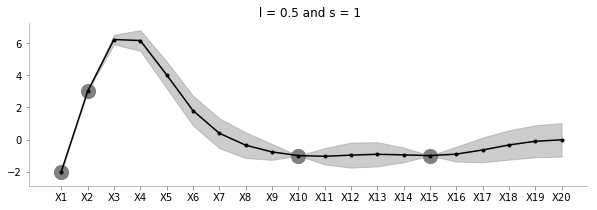

In [90]:
fit_plot_gp(1, 0.5, known_d, 20)

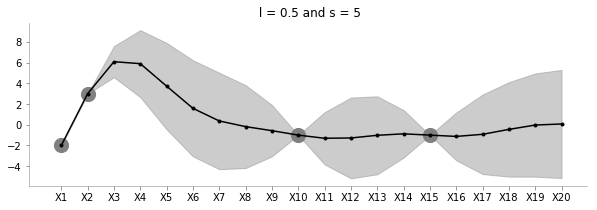

In [91]:
fit_plot_gp(5, 0.5, known_d, 20)

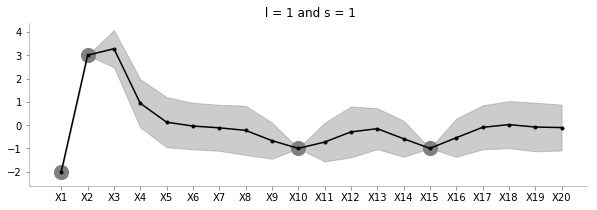

In [92]:
fit_plot_gp(1, 1, known_d, 20)

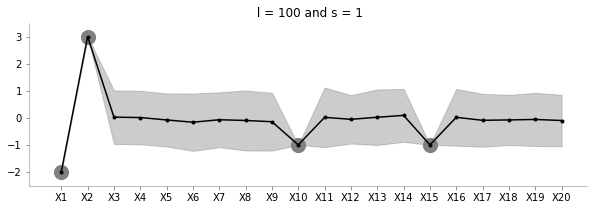

In [93]:
fit_plot_gp(1, 100, known_d, 20)

In [109]:
np.random.seed(0)
order_points_added = np.random.choice(range(20), size=9, replace=False)
k = {}
for i in range(9):
    k[order_points_added[i]] = np.random.choice(range(-3, 3))
    fit_plot_gp(1, 0.5, k, 20, True)

In [99]:
k[order_points_added[i]]

-3

In [97]:
np.random.choice(range(20), size=19, replace=False)

array([12, 13,  6, 17, 16, 10,  8,  3, 18, 15, 11,  5, 14,  1,  0, 19,  9,
        4,  7])

In [110]:
!convert

dyld: Library not loaded: /opt/X11/lib/libfontconfig.1.dylib
  Referenced from: /opt/ImageMagick/bin/convert
  Reason: image not found
